# Vino Verde Dataset 

A more complete description of the dataset [wine_data](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009) is here.

1. Import the usual libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

2. Import the dataset

In [2]:
dataset = pd.read_csv("Datasets/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dataset.quality.unique()

array([5, 6, 7, 4, 8, 3])

3. Check variables type

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


4. Plot quality of wine as a function of each variable

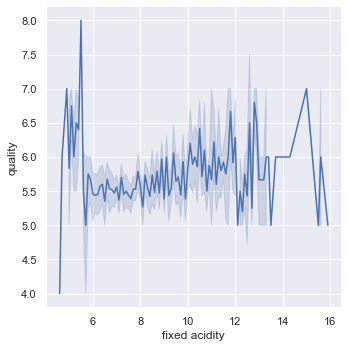

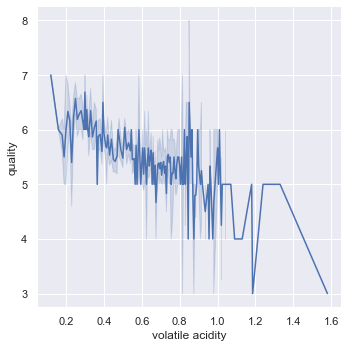

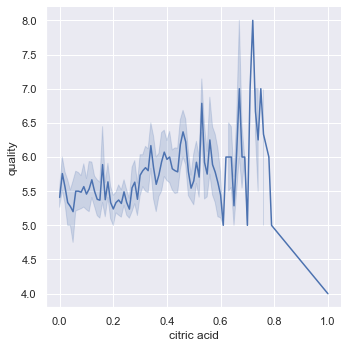

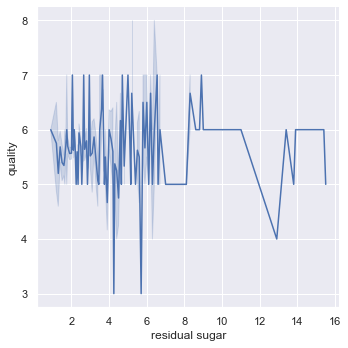

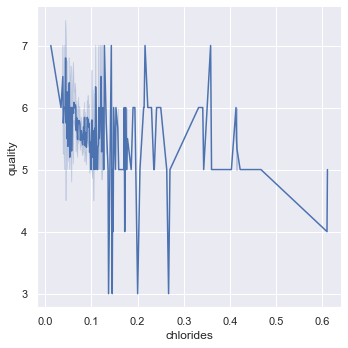

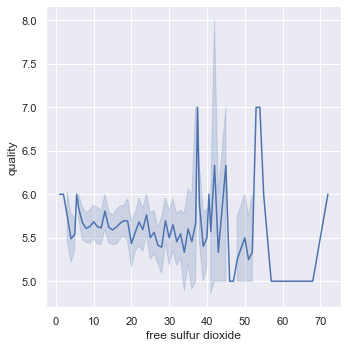

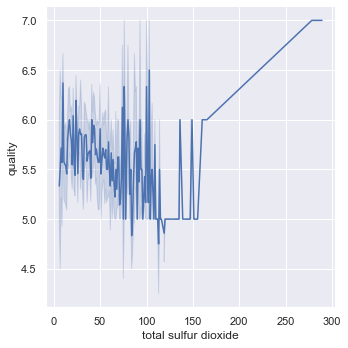

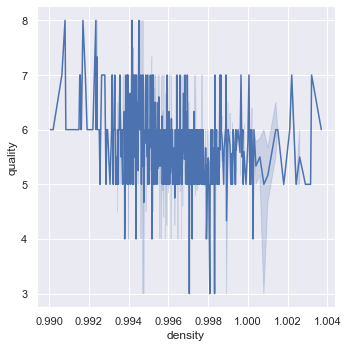

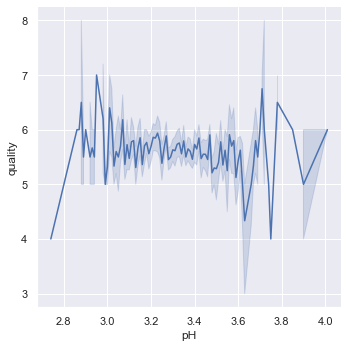

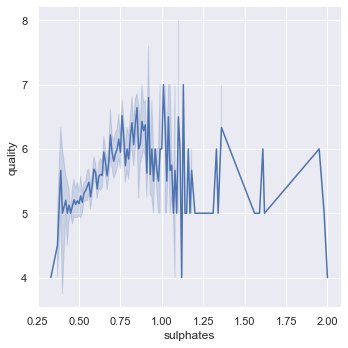

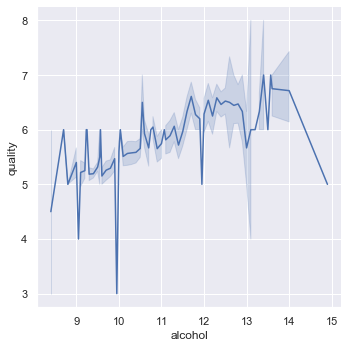

In [5]:
for i in np.arange(0, len(dataset.columns) - 1):
    sns.relplot(x=dataset.columns[i], y=dataset.columns[-1], data=dataset, kind="line")

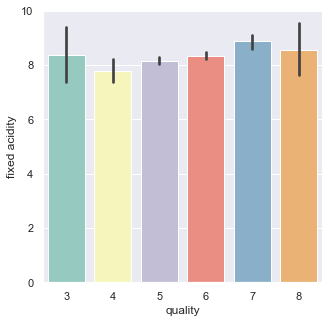

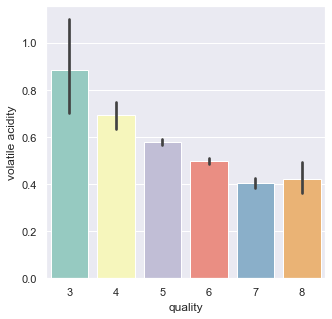

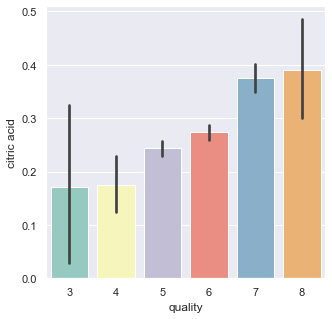

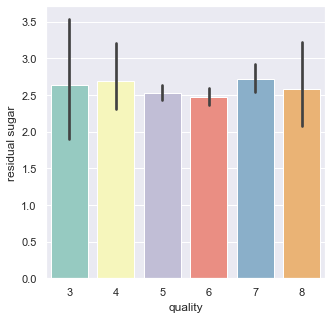

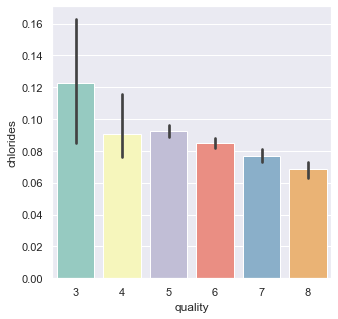

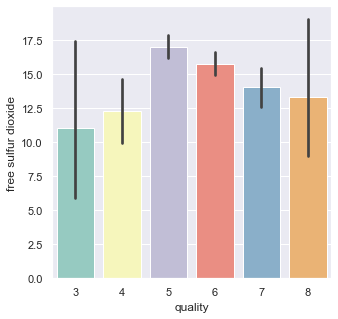

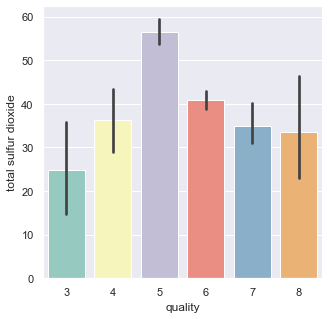

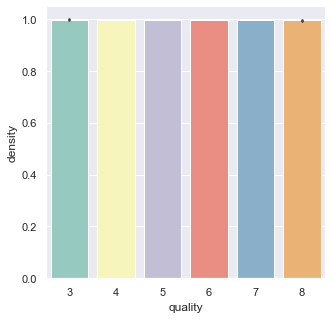

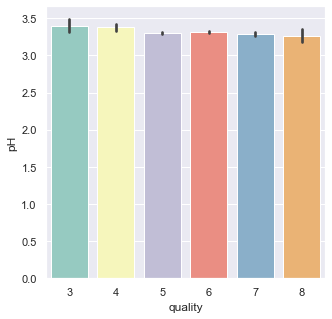

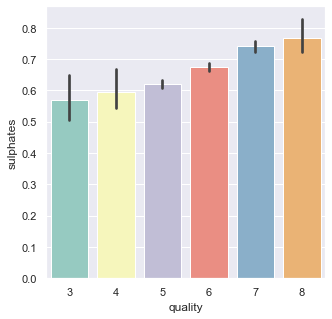

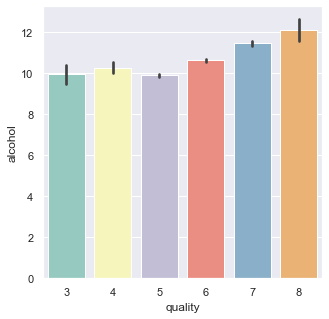

In [6]:
for i in np.arange(0, len(dataset.columns) - 1):
    fig = sns.barplot(x = 'quality', y = dataset.columns[i], palette="Set3", data = dataset)
    plt.show()

In [7]:
dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

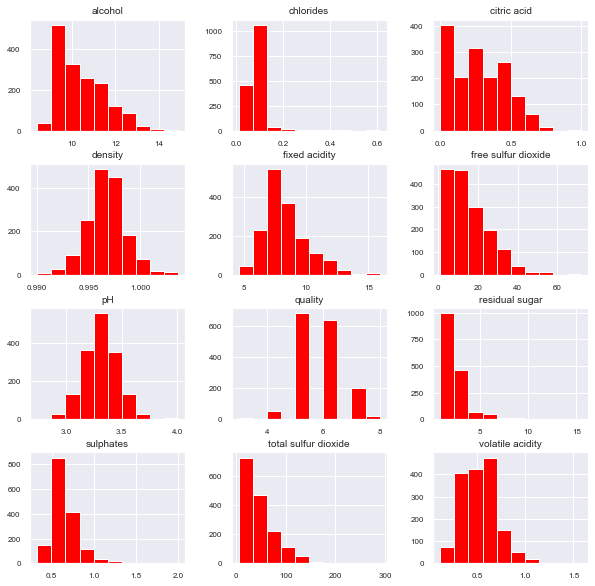

In [8]:
sns.set()
fig = dataset.hist(figsize=(10,10), color='red', xlabelsize=8, ylabelsize=8)
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

There are mostly wines of quality 5 and 6

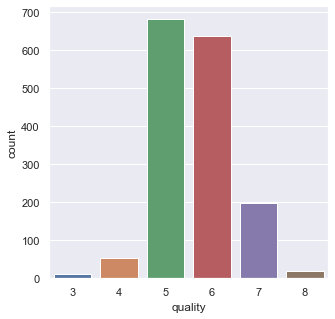

In [9]:
sns.countplot(x="quality", data=dataset)

We convert the quality values to 0 and 1 in order to feed it to the model. We could have also done this using a ```LabelEncoder()```.

In [10]:
# The target variable was updated after the change 3-6 not good wine, 6-8 good wine
dataset["quality"] = 1 * (dataset["quality"] >= 6)
qualityEqualsOne = dataset['quality'] == 1
qualityEqualsZero = dataset['quality'] == 0

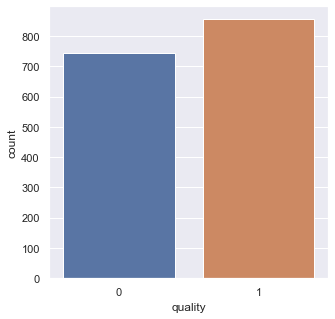

In [11]:
sns.countplot(x="quality", data=dataset)
#sns.catplot(x=dataset.columns[-1],data =dataset, kind="count") # same thing

We check for correlation between variables.

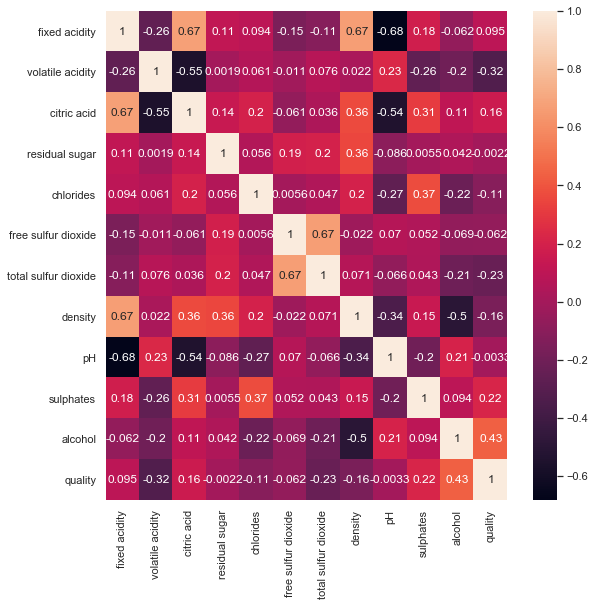

In [32]:
# Correlation matrix
plt.figure(figsize=(9, 9))
correlation = dataset.corr()
heatmap = sns.heatmap(correlation, annot=True)
plt.show()

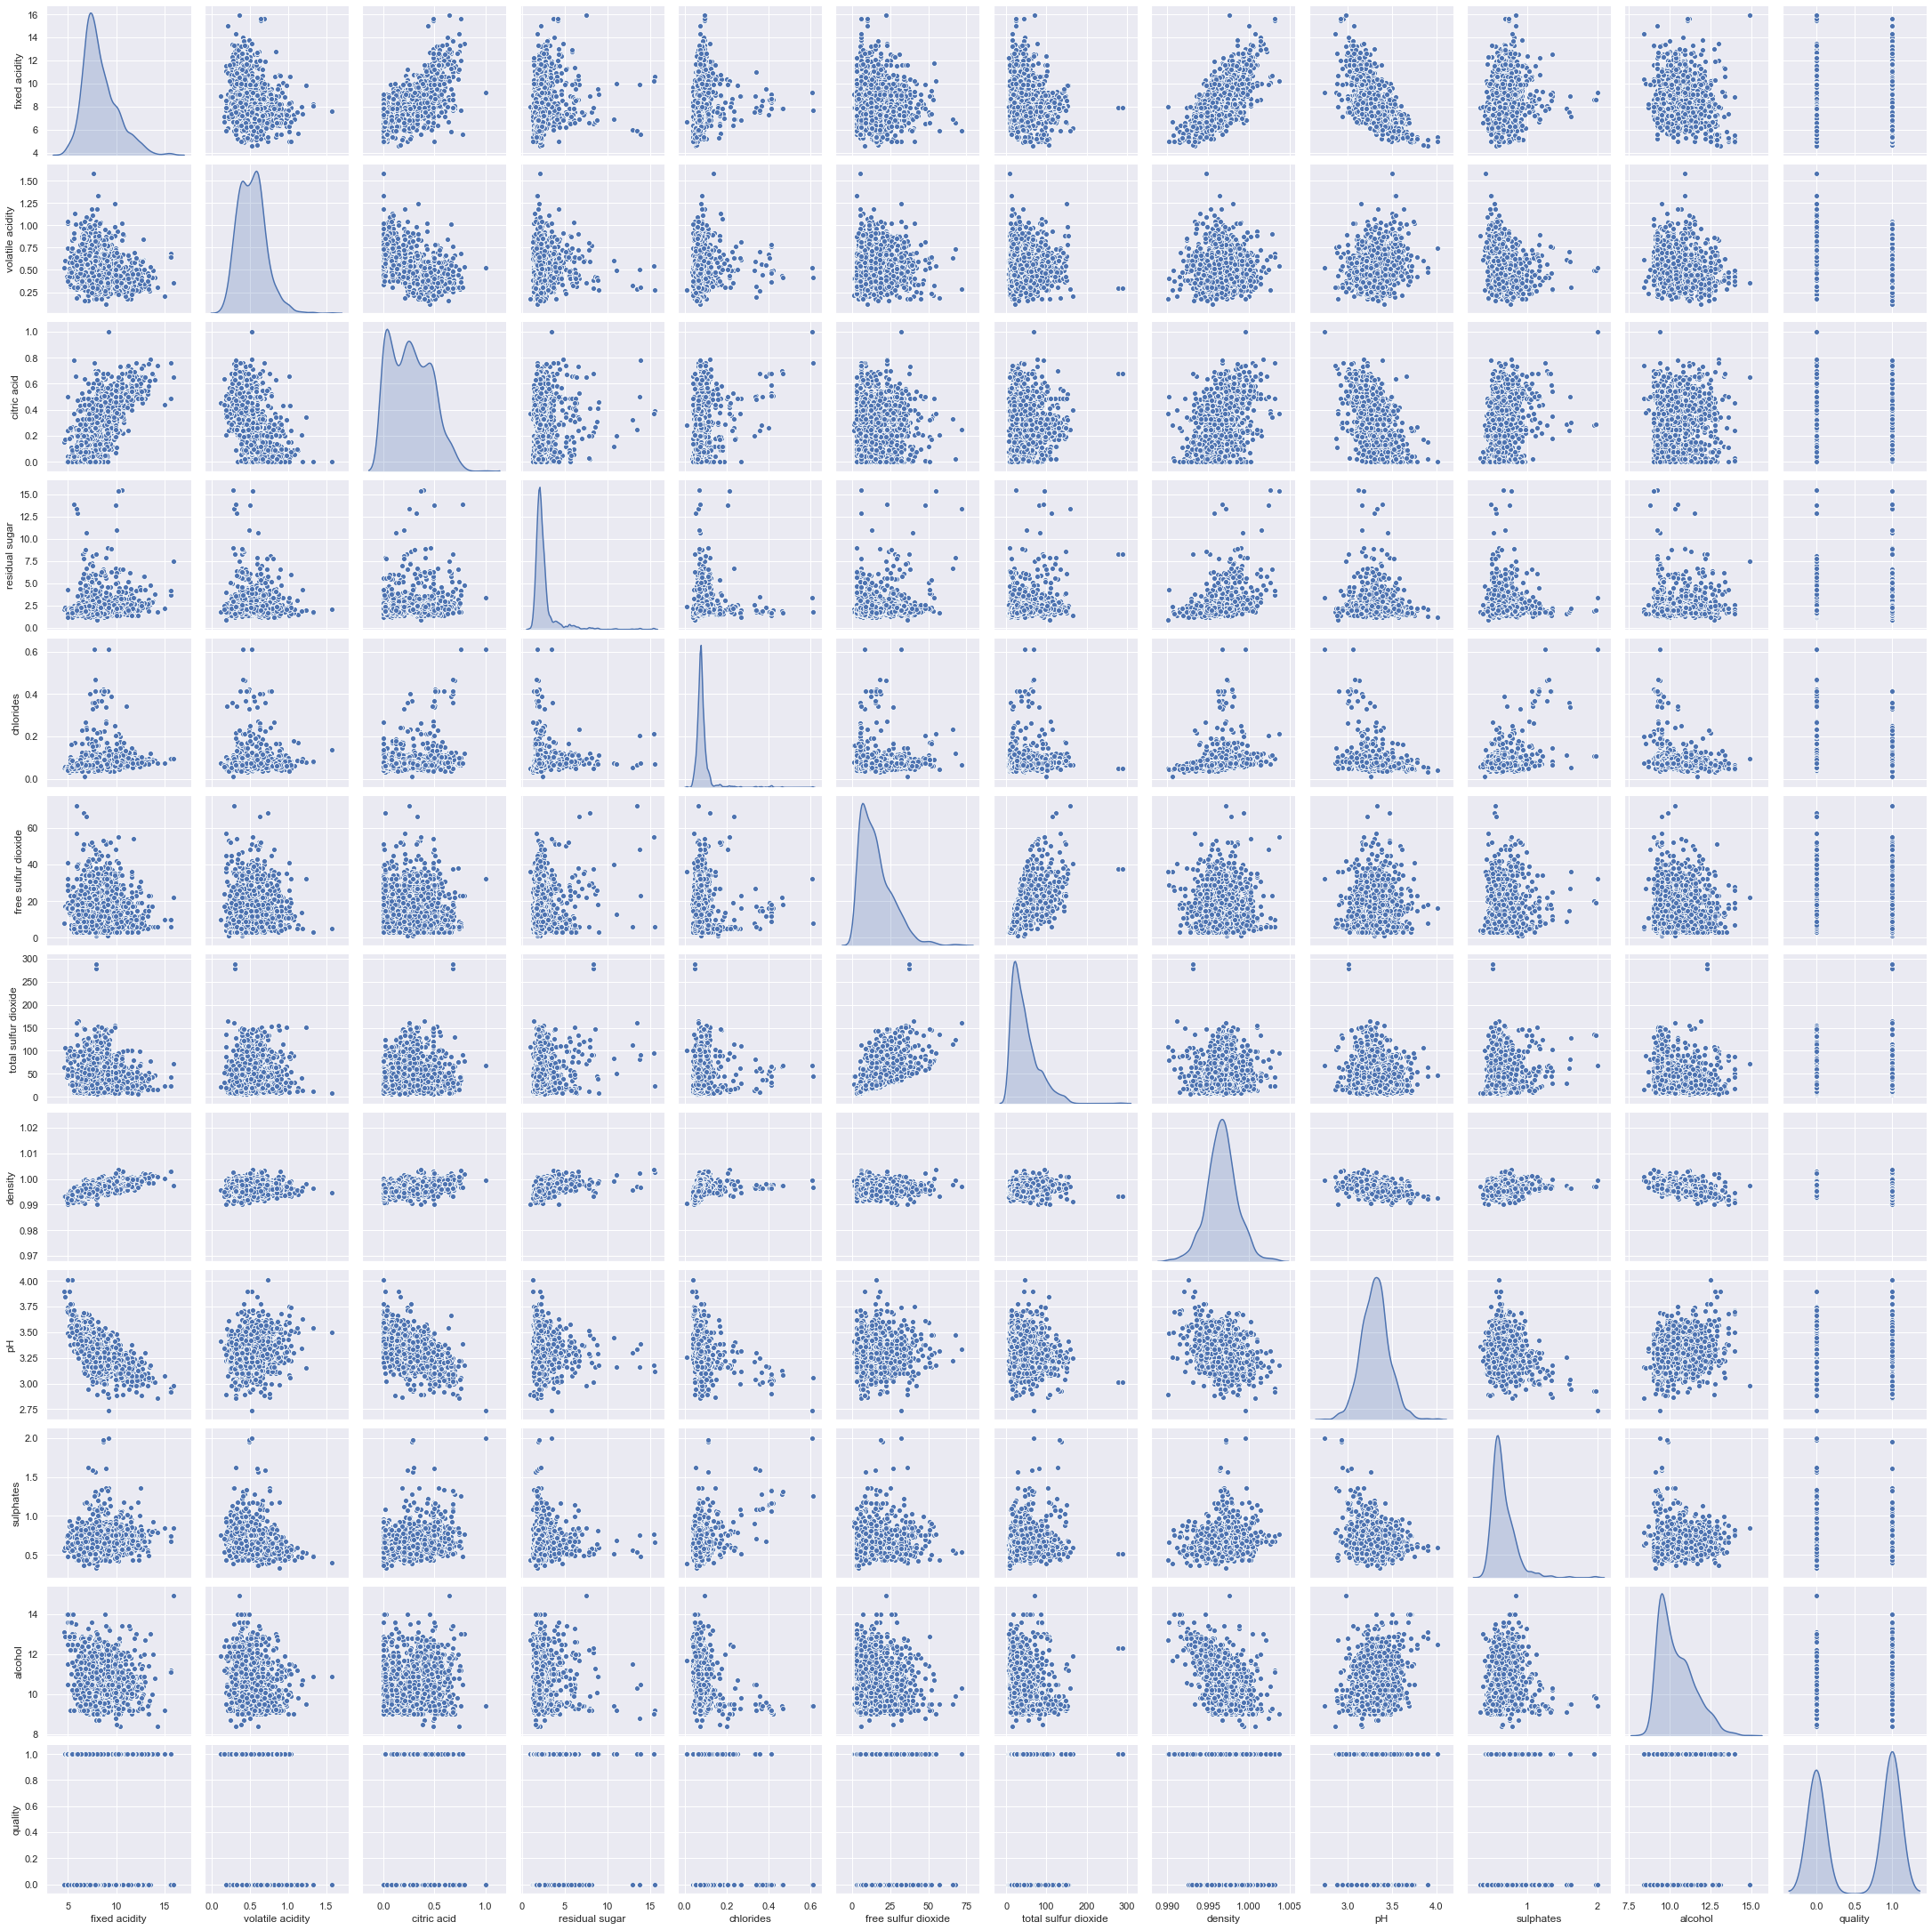

In [35]:
# Correlation matrix using scatterplot
sns.pairplot(dataset, diag_kind = "kde")

In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

5. We normalize the variables and feed them to the logistic regression.

In [13]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Compute the score.

In [15]:
classifier.score(X_test, y_test)

0.7556818181818182

7. We compute a cross validation to check the score that we got from the previous model.

In [16]:
from sklearn.model_selection import cross_val_score
print("Le score après cross validation est {}".format(cross_val_score(classifier, X_test, y_test).mean()))

Le score après cross validation est 0.7517340521114105


8. We get a ```y_pred``` that will be the prediction for ```X_test```.

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
y_pred_proba=classifier.predict_proba(X_test)
y_pred_proba

array([[0.82990905, 0.17009095],
       [0.65391907, 0.34608093],
       [0.7769235 , 0.2230765 ],
       ...,
       [0.83892902, 0.16107098],
       [0.67750799, 0.32249201],
       [0.83616906, 0.16383094]])

9. We compute a confusion matrix to check how the model performs, and we put it in a ```heatmap```.

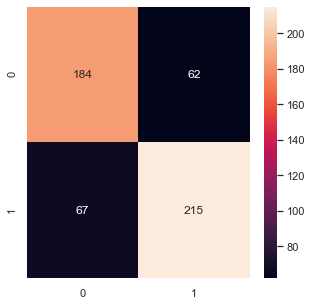

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=True, yticklabels=True)

In [20]:
dataset.quality.unique()

array([0, 1])

9. We want to classify the most important features based on our model. We use the [Chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html) metrics. 

In [25]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([5.26525668e+00, 1.00297102e+01, 5.66670287e+00, 5.84022628e-03,
        4.85195914e-01, 4.20059068e+01, 2.00230590e+03, 1.44572025e-04,
        1.22551075e-04, 3.31761735e+00, 3.29086327e+01]),
 array([2.17552144e-02, 1.54035272e-03, 1.72899237e-02, 9.39083866e-01,
        4.86078160e-01, 9.09981237e-11, 0.00000000e+00, 9.90406618e-01,
        9.91167376e-01, 6.85410969e-02, 9.65933872e-09]))

10. We put the values in a dataframe to better understand them.

In [26]:
feature_ranking = pd.DataFrame(
    columns=X.columns,
    data=feature_importance,
    index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total sulfur dioxide,2002.305900,0.000000e+00
free sulfur dioxide,42.005907,9.099812e-11
alcohol,32.908633,9.659339e-09
volatile acidity,10.029710,1.540353e-03
citric acid,5.666703,1.728992e-02
fixed acidity,5.265257,2.175521e-02
sulphates,3.317617,6.854110e-02
chlorides,0.485196,4.860782e-01
residual sugar,0.005840,9.390839e-01
density,0.000145,9.904066e-01


11. We put these variables in a barchart.

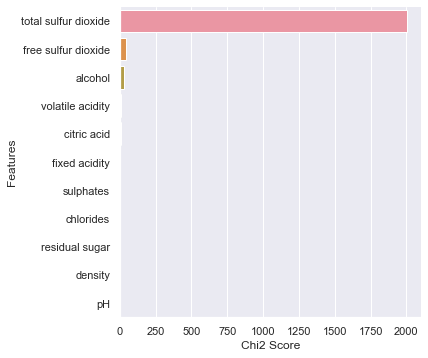

In [27]:
ax =sns.catplot(
    x="Chi2 Score",
    y=[index for index in feature_ranking.index],
    data = feature_ranking.sort_values("Chi2 Score", ascending=False),
    kind ="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

In [28]:
dataset['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

In [29]:
y_test.quality.value_counts()

1    282
0    246
Name: quality, dtype: int64